# Imports


In [2]:
import math
import os

import numpy as np
import pandas as pd

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stat

# Load data and view

In [35]:
orig = pd.read_csv("PSID.csv")
print(orig[:10])

   Seq No  intnum  persnum  age  educatn  earnings  hours  kids   married
0       1       4        4   39     12.0     77250   2940     2   married
1       2       4        6   35     12.0     12000   2040     2  divorced
2       3       4        7   33     12.0      8000    693     1   married
3       4       4      173   39     10.0     15000   1904     2   married
4       5       5        2   47      9.0      6500   1683     5   married
5       6       6        4   44     12.0      6500   2024     2   married
6       7       6      172   38     16.0      7000   1144     3   married
7       8       7        4   38      9.0      5000   2080     4  divorced
8       9       7      170   39     12.0     21000   2575     3   married
9      10       7      171   37     11.0         0      0     5   married


# Understand data (Size, Dimension, Data Types) and describe

In [20]:
# Size of the Data set (rows, columns)
print(orig.shape)
# Dimension of the Data set
print(orig.ndim)

(4856, 9)
2


In [31]:
# Data types of data in each column
orig.dtypes

Seq No        int64
intnum        int64
persnum       int64
age           int64
educatn     float64
earnings      int64
hours         int64
kids          int64
married      object
dtype: object

In [30]:
# Describe the data by getting basic statistical information
orig.describe()

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
count,4856.000000,4856.000000,4856.000000,4856.000000,4855.000000,4856.000000,4856.000000,4856.000000
mean,2428.500000,4598.101318,59.213550,38.462932,16.377137,14244.506178,1235.334843,4.481260
std,1401.950784,2761.971174,79.748556,5.595116,18.449502,15985.447449,947.175837,14.887856
min,1.000000,4.000000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000
25%,1214.750000,1905.000000,2.000000,34.000000,12.000000,85.000000,32.000000,1.000000
50%,2428.500000,5464.000000,4.000000,38.000000,12.000000,11000.000000,1517.000000,2.000000
75%,3642.250000,6655.000000,170.000000,43.000000,14.000000,22000.000000,2000.000000,3.000000
max,4856.000000,9306.000000,205.000000,50.000000,99.000000,240000.000000,5160.000000,99.000000


# Hypothesis Test 01

H0 = Average earnings per family is greater than 14000 if the education level is greater than 12

Ha = Average earnings per family is less than 14000 if the education level is less than 12

In [34]:
# understand the correlation using spearman correlation coefficiant
orig.corr(method="spearman")

,Seq No,intnum,persnum,age,educatn,earnings,hours,kids
Seq No,1.000000,1.000000,-0.384426,-0.016184,-0.266457,-0.197602,-0.118188,0.143375
intnum,1.000000,1.000000,-0.384657,-0.016090,-0.266470,-0.197587,-0.118169,0.143387
persnum,-0.384426,-0.384657,1.000000,-0.257953,0.161101,0.060876,0.042910,-0.112442
age,-0.016184,-0.016090,-0.257953,1.000000,-0.026466,0.076098,0.046605,0.155847
educatn,-0.266457,-0.266470,0.161101,-0.026466,1.000000,0.355134,0.174441,-0.265205
earnings,-0.197602,-0.197587,0.060876,0.076098,0.355134,1.000000,0.793336,-0.260386
hours,-0.118188,-0.118169,0.042910,0.046605,0.174441,0.793336,1.000000,-0.188060
kids,0.143375,0.143387,-0.112442,0.155847,-0.265205,-0.260386,-0.188060,1.000000


In [36]:
# we can see the highest correlation value is between earnings and hours, 
# but our hyphothesis between earnings and education that has the the second highest value.
hypoValue = 14000

highEarning = orig[orig.earnings > hypoValue].educatn
print("High earning count =", highEarning.count())

lowEarning = orig[orig.earnings < hypoValue].educatn
print("Low earning count =", lowEarning.count())


High earning count = 2059
Low earning count = 2729


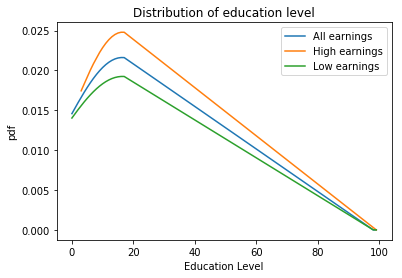

In [38]:
# Total Population
sortPopulation = orig['educatn'].sort_values();
eduEarnLine = stat.norm.pdf(sortPopulation, sortPopulation.mean(), sortPopulation.std())
plt.plot(sortPopulation, eduEarnLine , label='All earnings')

# Sampling
sampleSize = 500
eduLevelWithHighEarning = orig[orig.earnings> hypoValue].educatn.sample(sampleSize).sort_values()
eduLevelWithLowEarning = orig[orig.earnings< hypoValue].educatn.sample(sampleSize).sort_values()

eduEarnLine1 = stat.norm.pdf(eduLevelWithHighEarning, eduLevelWithHighEarning.mean(), eduLevelWithHighEarning.std())
plt.plot(eduLevelWithHighEarning, eduEarnLine1, label='High earnings')

eduEarnLine2 = stat.norm.pdf(eduLevelWithLowEarning, eduLevelWithLowEarning.mean(), eduLevelWithLowEarning.std())
plt.plot(eduLevelWithLowEarning, eduEarnLine2, label='Low earnings')

plt.title('Distribution of education level')
plt.xlabel('Education Level')

# pdf stands for Probability Density Function
plt.ylabel('pdf')
plt.legend()

In [1]:
# we have to remove outliers and generate the plot again